# Gerar uma tabela de valores aleatórios de NASA-TLX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
df = pd.read_excel("D:\ITA\Pesquisa\Resultados\Questionários pesquisa.xlsx")
participantes = df.loc[:,'Participante:']
df_resto_1 = df.drop(['Idade:','Sexo:','Como deficiente visual você se identifica como:'],axis = 1)

In [3]:
ordemCenarios = df_resto_1.iloc[:,range(1,7)]
#ordemCenarios = ordemCenarios.drop(ordemCenarios.columns[range(1,4)], axis = 1)
ordemCenarios.set_index(keys = "Participante:", inplace = True)
df_resto_2 = df_resto_1.drop(ordemCenarios.columns,axis = 1)


In [4]:
cenas = list(range(1,6))
etapas = [1,2]
dimensoesNasa = ["Demanda Mental",'Demanda física', 'Demanda Temporal', 'Perfomance', 'Esforço', 'Frustação']
dimensoesNasas_todas = ['Participante:']
for c in cenas:
    for e in etapas:
        for d in dimensoesNasa:
            nome = str(c) + '.' + str(e) + ') '+ d
            dimensoesNasas_todas.append(nome)

dfNasa = df_resto_2.loc[:,dimensoesNasas_todas]
dfNasa.set_index('Participante:',inplace = True)
df_resto_3 = df_resto_2.drop(dfNasa.columns, axis = 1)
dfNasa.head()


,1.1) Demanda Mental,1.1) Demanda física,1.1) Demanda Temporal,1.1) Perfomance,1.1) Esforço,1.1) Frustação,1.2) Demanda Mental,1.2) Demanda física,1.2) Demanda Temporal,1.2) Perfomance,...,5.1) Demanda Temporal,5.1) Perfomance,5.1) Esforço,5.1) Frustação,5.2) Demanda Mental,5.2) Demanda física,5.2) Demanda Temporal,5.2) Perfomance,5.2) Esforço,5.2) Frustação
Participante:,,,,,,,,,,,,,,,,,,,,,
001C,3,2,1,15,4,4,1,1,1,18,...,1,14,6,5,6,6,1,16,4,4
001,6,7,6,15,7,6,6,7,6,16,...,11,9,8,7,10,11,9,7,10,9


In [5]:
perguntasSagat = ["Existe algum objeto próximo de você?", 'Sinalize onde o objeto está', 'Existe alguém perto de você?', 'Sinaliza onde está pessoa esta', 
'Você percebeu alguma fonte de som característica do lugar onde você se encontra?', 'Sinalize de onde vem o som', 'Sinalize em que direção está a recepcionista', 
'Sinalize em que direção está a saída', 'Qual a distância você imagina que existe entre a mesa da recepção e qual direção ela está?',	
'Qual a distância você imagina que existe entre a saída?']

perguntasSagat_todas = ['Participante:'] 
for c in cenas:
    for e in etapas:
        for p in perguntasSagat:
            nome = str(c) + '.' + str(e) + ') '+ p
            perguntasSagat_todas.append(nome)

dfSagat = df_resto_3.loc[:,perguntasSagat_todas]
dfSagat.set_index('Participante:',inplace = True)
df_resto_4 = df_resto_3.drop(dfSagat.columns, axis = 1)
dfSagat.head()

,1.1) Existe algum objeto próximo de você?,1.1) Sinalize onde o objeto está,1.1) Existe alguém perto de você?,1.1) Sinaliza onde está pessoa esta,1.1) Você percebeu alguma fonte de som característica do lugar onde você se encontra?,1.1) Sinalize de onde vem o som,1.1) Sinalize em que direção está a recepcionista,1.1) Sinalize em que direção está a saída,1.1) Qual a distância você imagina que existe entre a mesa da recepção e qual direção ela está?,1.1) Qual a distância você imagina que existe entre a saída?,...,5.2) Existe algum objeto próximo de você?,5.2) Sinalize onde o objeto está,5.2) Existe alguém perto de você?,5.2) Sinaliza onde está pessoa esta,5.2) Você percebeu alguma fonte de som característica do lugar onde você se encontra?,5.2) Sinalize de onde vem o som,5.2) Sinalize em que direção está a recepcionista,5.2) Sinalize em que direção está a saída,5.2) Qual a distância você imagina que existe entre a mesa da recepção e qual direção ela está?,5.2) Qual a distância você imagina que existe entre a saída?
Participante:,,,,,,,,,,,,,,,,,,,,,
001C,0.5,0.25,1,0,1,0.5,1,1,1,0,...,0.5,0,1,1,1,0,1,1,0,0
001,1.0,1.00,1,1,1,1.0,1,1,1,1,...,0.5,0,1,1,1,0,1,1,1,0


In [6]:
dfQuestionario = df_resto_4.set_index('Participante:').drop('Carimbo de data/hora', axis = 1 )
dfQuestionario.head()

,2.2) Os sons foram de fácil interpretação e localização?,2.2) Os sons causaram algum incômodo durante o uso?,2.2) Os comandos foram claros?,2.2) Como você avalia a quantidade de comandos?,2.2) Os momentos em que os comandos foram reproduzidos foram inadequados?,2.2) O som ambiente atrapalhou a reprodução de algum comando?,2.2) Você sentiu falta de alguma informação durante a orientação via áudio?,3.2),3.2) A vibração do cinto causou algum incômodo durante o uso?,3.2) A vibração do cinto causou alguma confusão durante a navegação?,...,5.2) O cinto causou algum incômodo durante o uso?,5.2) A mistura de comandos de áudio com vibração te trouxe mais segurança?,"5.2) De forma geral, como você avalia a quantidade de informação recebida?",5.2) A informação da vibração da bengala foi precisa?,5.2) A bengala virtual funcionou semelhantemente à bengala tradicional?,5.2) O uso da bengala foi intuitivo?,5.2) A bengala causou algum incômodo durante o uso?,5.2) A bengala causou alguma confusão durante a navegação?,5.2) Você sentiu falta de alguma informação durante a orientação?,"5.2) Considerando a emissão de comandos via áudio e via cinto háptico, você considera que algum deles é desnecessário?"
Participante:,,,,,,,,,,,,,,,,,,,,,
001C,2,1,1,6,7,3,Sim. Precisão. Exmeplo a Mesa está a 2m. Falta...,5,1,5,...,1,1,3,5,3,5,1,2,"Sim, falta a forma do objeto",Audio não foi necessário
001,3,4,7,6,7,3,Não,2,2,5,...,3,7,5,6,0,3,1,2,Não,Cinto


In [9]:
dfNasa
dfNasa.iloc[:,0]

Participante:
001C    3
001     6
Name: 1.1) Demanda Mental, dtype: int64

# Reestruturar os dados

In [38]:
dfNasa.head()
#dfNasa.columns[[0,6,12,18,24,30,36,42,48,54]]

#np.savetxt('sdas.txt',dfNasa,fmt='%i', delimiter= ',')

,1.1) Demanda Mental,1.1) Demanda física,1.1) Demanda Temporal,1.1) Perfomance,1.1) Esforço,1.1) Frustação,1.2) Demanda Mental,1.2) Demanda física,1.2) Demanda Temporal,1.2) Perfomance,...,5.1) Demanda Temporal,5.1) Perfomance,5.1) Esforço,5.1) Frustação,5.2) Demanda Mental,5.2) Demanda física,5.2) Demanda Temporal,5.2) Perfomance,5.2) Esforço,5.2) Frustação
Participante:,,,,,,,,,,,,,,,,,,,,,
001C,3,2,1,15,4,4,1,1,1,18,...,1,14,6,5,6,6,1,16,4,4
001,6,7,6,15,7,6,6,7,6,16,...,11,9,8,7,10,11,9,7,10,9


In [49]:
# Criar uma coluna contendo as informações do Método e da Etapa de cada experimento.

nasa = []
for p in range(len(participantes)):
    nasaPorCena = []
    for c in range(len(cenas)):
        nasaPorEtapa = []
        for e in range(len(etapas)):
            nasaEtapa = []
            for d in range(len(dimensoesNasa)):
                nasaEtapa.append(dfNasa.iloc[p,d+e*6+c*12])
            nasaPorEtapa.append(nasaEtapa)
        nasaPorCena.append(nasaPorEtapa)
    nasa.append(nasaPorCena)

mdMean = []
for p in range(len(participantes)):
    mdMeanPorCena = []
    for c in range(len(cenas)):
        mdMeanPorEtapa = []
        for e in range(len(etapas)):
            mdMeanEtapa = []
            for d in range(len(dimensoesNasa)):
                mdMeanEtapa.append(dfNasa.iloc[p,d+e*6+c*12])

# Reorganizar os dados gerando uma tabela por pergunta do questionário (usando melt).
#dfNasa_met = pd.melt(dfNasa)
#dfNasa_met
#dimensoesNasa = []
#dimensoesNasa_melt = []
#for col in range(4,len(nasa_df.columns)):
#    dim = pd.concat(objs = [nasa_df['Participante'],nasa_df['Método'],nasa_df['Etapa'],cena,nasa_df[nasa_df.columns[col]]], axis=1, join='outer')
#    dimensoesNasa.append(dim)
#    dimensoesNasa_melt.append(pd.melt(dim,id_vars = ['Participante','Método','Etapa','Cena'], value_vars=nasa_df.columns[col], var_name='Dimensões do NASA'))
    

# Reorganizar os dados gerando uma tabela por pergunta do questionário (usando pivot).
#dimensoesNasa_pivot = []
#for col in range(4,len(nasa_df.columns)):
#    dim = pd.concat(objs = [nasa_df['Participante'],nasa_df['Método'],nasa_df['Etapa'],cena,nasa_df[nasa_df.columns[col]]], axis=1, join='outer')
#    dim = dim.pivot(index =  'Participante', columns = ['Cena'], values =  dim.columns[4])
#    dimensoesNasa_pivot.append(dim)
    


[10, 6, 1, 9, 6, 8]


# Analisar os dados do NASA-TLX usando ANOVA

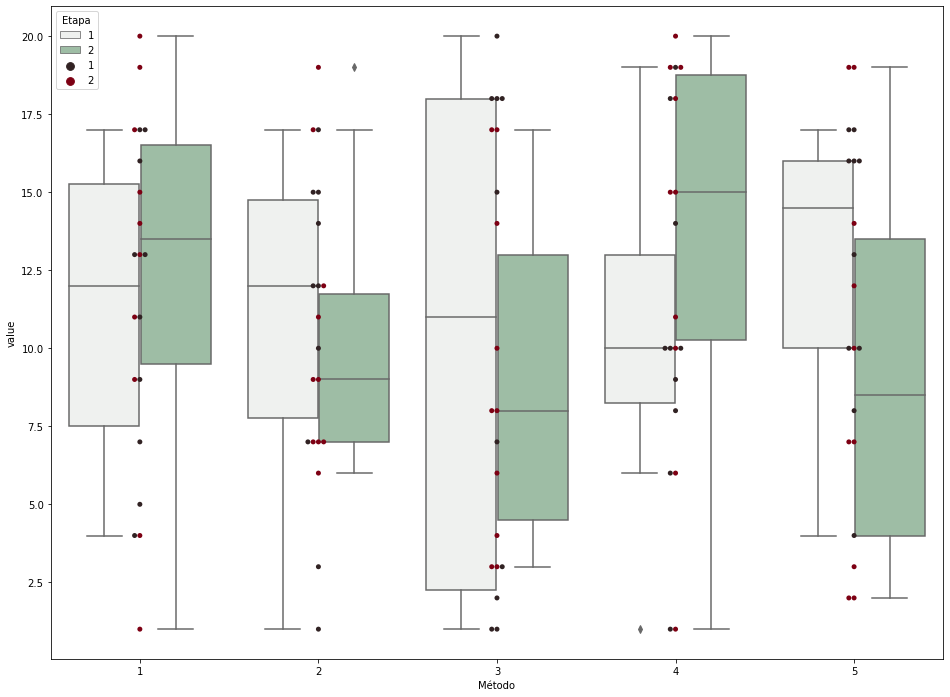

In [5]:
# Gerar um boxplot para ver a distribuição dos tratamentos e ver como está o comportamento da variância
plt.figure(figsize=(16, 12))
bp = sns.boxplot(x='Método', hue='Etapa', y='value', data=dimensoesNasa_melt[0], color='#99c2a2')
sp = sns.swarmplot(x="Método", hue='Etapa', y="value", data=dimensoesNasa_melt[0], color='#7d0013')
plt.show()

In [17]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(dimensoesNasa_pivot[0]['1,1'],dimensoesNasa_pivot[0]['1,2'],dimensoesNasa_pivot[0]['2,1'],dimensoesNasa_pivot[0]['2,2'],dimensoesNasa_pivot[0]['3,1'],dimensoesNasa_pivot[0]['3,2'],dimensoesNasa_pivot[0]['4,1'],dimensoesNasa_pivot[0]['4,2'],dimensoesNasa_pivot[0]['5,1'],dimensoesNasa_pivot[0]['5,2'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# Ordinary Least Squares (OLS) model
model = ols('value ~ 4(Método)', data=dimensoesNasa_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
## output (ANOVA F and p value)
#                sum_sq    df         F    PR(>F)
#C(treatments)  3010.95   3.0  17.49281  0.000026
#Residual        918.00  16.0       NaN       NaN
#
## ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
#from bioinfokit.analys import stat
#res = stat()
#res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
#res.anova_summary
## output (ANOVA F and p value)
#                 df   sum_sq   mean_sq         F    PR(>F)
#C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
#Residual       16.0   918.00    57.375       NaN       NaN
#
## note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
## (typ parameter) will produce similar results.

0.5903765552292003 0.8018383462480272


<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?


In [16]:
dimensoesNasa_melt

[    Participante  Método  Etapa Cena Dimensões do NASA  value
 0              1       1      1  1,1    Demanda Mental      5
 1              1       1      2  1,2    Demanda Mental     15
 2              1       2      1  2,1    Demanda Mental      1
 3              1       2      2  2,2    Demanda Mental      9
 4              1       3      1  3,1    Demanda Mental      1
 ..           ...     ...    ...  ...               ...    ...
 95            10       3      2  3,2    Demanda Mental      4
 96            10       4      1  4,1    Demanda Mental      1
 97            10       4      2  4,2    Demanda Mental      1
 98            10       5      1  5,1    Demanda Mental     10
 99            10       5      2  5,2    Demanda Mental     19
 
 [100 rows x 6 columns],
     Participante  Método  Etapa Cena Dimensões do NASA  value
 0              1       1      1  1,1    Demanda física     19
 1              1       1      2  1,2    Demanda física     16
 2              1       2   

In [6]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [15]:

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
## output (ANOVA F and p value)
#                sum_sq    df         F    PR(>F)
#C(treatments)  3010.95   3.0  17.49281  0.000026
#Residual        918.00  16.0       NaN       NaN
#
## ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
#from bioinfokit.analys import stat
#res = stat()
#res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
#res.anova_summary
## output (ANOVA F and p value)
#                 df   sum_sq   mean_sq         F    PR(>F)
#C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
#Residual       16.0   918.00    57.375       NaN       NaN
#
## note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
## (typ parameter) will produce similar results.

17.492810457516338 2.639241146210922e-05


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [14]:
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40
